In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
# Define the autoencoder model
def build_autoencoder(input_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    
    model.add(Dense(32, activation='relu'))
    
    model.add(Dense(64, activation='relu'))
    
    model.add(Dense(np.prod(input_shape), activation='sigmoid'))
    model.add(Reshape(input_shape))
    return model


In [6]:
# Load the image
image_path = r"aria.png"
image      = Image.open(image_path).convert('L')  # Convert the image to grayscale

image_array = np.array(image)

image_array.shape

(633, 966)

In [7]:
# Normalize the image
image_array = image_array / 255.0

In [8]:
# Add a batch dimension
image_array = np.expand_dims(image_array, axis=0)

In [9]:
image_array.shape

(1, 633, 966)

In [11]:
# Get the shape of the input image
input_shape = image_array.shape[1:]
input_shape

(633, 966)

In [12]:
# Build the autoencoder model
autoencoder = build_autoencoder(input_shape)

D:\ANACONDA3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

In [14]:
# Train the autoencoder with the single image
history = autoencoder.fit(image_array, 
                          image_array, 
                          epochs=100, 
                          batch_size=1, 
                          #callbacks=[EarlyStopping(patience=10)]
                         )


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0877
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step - loss: 0.0876
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step - loss: 0.0826
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step - loss: 0.0425
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step - loss: 0.0107
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0168
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step - loss: 0.0174
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step - loss: 0.0158
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step - loss: 0.0135
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step - loss: 0.0123
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step - loss: 0.0111
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step - loss: 0.0096
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step - loss: 0.0082
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step - loss: 0.0071
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step - loss: 0.0060
Epoch 16/1

In [15]:
# Reconstruct the image
reconstructed_image = autoencoder.predict(image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


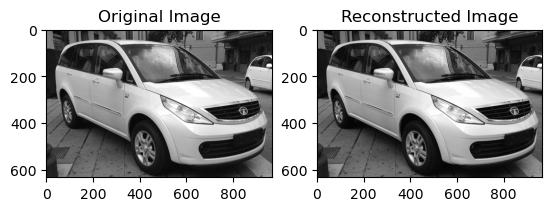

In [16]:
# Plot the original and reconstructed images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_array[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image[0], cmap='gray')
plt.show()

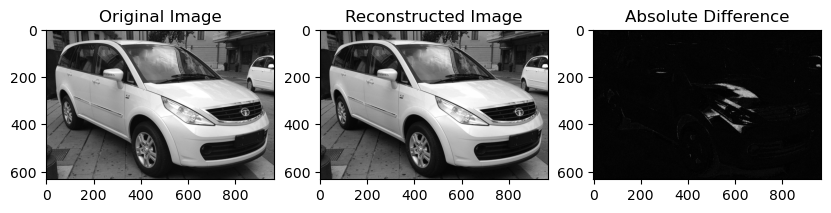

In [17]:
difference_image = np.abs(image_array - reconstructed_image)

# Plot the original, reconstructed, and difference images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image_array[0], cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image[0], cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Absolute Difference')
plt.imshow(difference_image[0], cmap='gray')
plt.show()